# **Predicción de ingresos de clientes de Google Analytics**
# **Predecir cuánto gastarán los clientes de GStore**

# **Nota IMPORTANTE**
Ahora hemos actualizado los datos para trabajar con la nueva formulación de problemas con visión de futuro. Tenga en cuenta que en esta competencia estará prediciendo el objetivo para TODOS los usuarios en el conjunto de prueba publicado:, test_v2.csvpara sus transacciones en el período futuro del 1 de diciembre de 2018 al 31 de enero de 2019.

# **¿Qué archivos necesito?**
Deberá descargar train_v2.csv y test_v2.csv . Estos contienen los datos necesarios para hacer predicciones para cada uno de los que se fullVisitorIdenumeran en sample_submission_v2.csv .

Lamentablemente, debido a limitaciones de tiempo, la versión de BigQuery de estos datos no estará disponible de inmediato.

# **¿Cuál debo esperar que sea el formato de datos?**
Tanto train_v2.csv como test_v2.csv contienen las columnas que se enumeran en Campos de datos. Cada fila del conjunto de datos es una visita a la tienda. Debido a que estamos prediciendo el registro de los ingresos totales por usuario , tenga en cuenta que no todas las filas en test_v2.csv corresponderán a una fila en el envío, pero todos los correos electrónicos únicos fullVisitorIdcorresponderán a una fila en el envío.

# **IMPORTANTE:** 
Debido al formato fullVisitorId, debe cargar los Id como cadenas para que todos los Id sean correctamente únicos.
Hay varias columnas que contienen blobs JSON de diferente profundidad. En una de esas columnas JSON totals, la subcolumna transactionRevenuecontiene la información de ingresos que estamos tratando de predecir. Esta subcolumna existe solo para los datos de entrenamiento.

# **¿Qué estoy prediciendo?**
Estamos prediciendo el registro natural de la suma de todas las transacciones por usuario . Una vez que se actualicen los datos, como se indicó anteriormente, esto será para todos los usuarios en test_v2.csv del 1 de diciembre de 2018 al 31 de enero de 2019.
Tenga en cuenta que el conjunto de datos NO contiene datos del 1 de diciembre de 2018 al 31 de enero de 2019. Debe identificar los fullVisitorIdcorreos electrónicos únicos en el test_v2.csv proporcionado y hacer predicciones para esos meses no vistos.Para cada usuario del conjunto de prueba, el objetivo es: 
$$ y_ {usuario} = \sum_ {i = 1} ^ {n} transacción_ {usuario_i} $$ 
$$ target_ {usuario} = \ ln ({y_ {usuario } +1}) $$

# **¿Cómo se calculan las tablas de clasificación públicas y privadas?**
sample_submission_v2.csvestá compuesto por todos los ID de visitante completos para el período de 05/ 01/ 18 al 10/ 15/ 18. La presentación de la tabla de clasificación pública para este archivo se basa en un período de tiempo diferente al de la tabla de clasificación privada.

El Public LB se está calculando para esos visitantes durante el mismo período de 5/ 1/ 18 al 10/ 15/ 18. Todo esto está disponible públicamente para la predicción del objetivo, pero tiene la intención de proporcionar algún medio de señal para aquellos que deseen usarlo de esa manera. El LB privado se está calculando en el marco de tiempo a futuro del 01/ 12/ 18 al 01/ 31/ 19, para ese mismo grupo de usuarios.

Por lo tanto, su envío que está destinado al período de tiempo de LB público será diferente del período de tiempo de LB privado, que se volverá a puntuar / recalcular en el marco de tiempo futuro.

Sabiendo esto, los competidores deben hacer selecciones explícitas de presentación final para aquellas presentaciones que representen lo que esperan que sean esas predicciones a futuro. Estas selecciones de presentación final para las que esta competencia permite 2, según las reglas, se pueden realizar en "Mis presentaciones" antes de la fecha límite de presentación final.



# **Descripciones de archivos**
* **train_v2.csv** : Es el conjunto de entrenamiento actualizado, contiene transacciones de usuarios desde el 1 de agosto de 2016 hasta el 30 de abril de 2018.
* **test_v2.csv** : Es el conjunto de pruebas actualizado, contiene transacciones de usuarios desde el 1 de mayo de 2018 hasta el 15 de octubre de 2018.
* **sample_submission_v2.csv** : Es un archivo de envío de muestra actualizado en el formato correcto. Contiene todos fullVisitorId los mensajes de correo electrónico en test_v2.csv . La PredictedLogRevenuecolumna de su envío debe hacer predicciones prospectivas para cada uno de estos fullVisitorIdcorreos electrónicos para el período del 1 de diciembre de 2018 al 31 de enero de 2019. 
# **Campos de información**
* **fullVisitorId** : un identificador único para cada usuario de Google Merchandise Store.
* **channelGrouping**  : el canal a través del cual el usuario llegó a la tienda.
* **date**  : la fecha en la que el usuario visitó la Tienda.
* **device**  : las especificaciones del dispositivo utilizado para acceder a la Tienda.
* **geoNetwork**  : esta sección contiene información sobre la geografía del usuario.
* **socialEngagementType**  : tipo de compromiso, ya sea "Socialmente comprometido" o "No socialmente comprometido".
* **totals**  : esta sección contiene valores agregados a lo largo de la sesión.
* **trafficSource**  : esta sección contiene información sobre la fuente de tráfico desde la que se originó la sesión.
* **visitId**  : un identificador para esta sesión. Esto es parte del valor que normalmente se almacena como cookie _utmb. Esto es exclusivo del usuario. Para obtener un ID completamente único, debe utilizar una combinación de fullVisitorId y visitId.
* **visitNumber**  : el número de sesión de este usuario. Si esta es la primera sesión, entonces se establece en 1.
* **visitStartTime**  : la marca de tiempo (expresada como hora POSIX).
* **hits** : esta fila y los campos anidados se completan para todos y cada uno de los tipos de hits. Proporciona un registro de todas las visitas a la página.
* **customDimensions** : esta sección contiene las dimensiones personalizadas de nivel de usuario o de sesión que se establecen para una sesión. Este es un campo repetido y tiene una entrada para cada dimensión que se establece.
* **totals**  : este conjunto de columnas incluye principalmente datos agregados de alto nivel.
# **Datos externos**
Se permiten datos externos para esta competencia, según esta publicación del foro . Esto incluye la cuenta de demostración de Google Merchandise Store . Aunque la cuenta de demostración contiene la variable predicha, la clasificación final no se beneficiará del acceso a estos datos externos, ya que requiere predicciones a futuro.

# ***Conexion a la API de Kaggle***

In [ ]:
# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
# Valeria Quiroz  - Gabriel Zapata, por un problema en la comunicacion con la API toca darle dos veces a play de colab,
#la primera veces saca un error la segunda si corre normal
!pip install kaggle
api_token = {"username":"gabrielzapata","key":"45d11139cb4e32995898eae373213b5f"}
import json
import zipfile
import os
with open('/content/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!mkdir /root/.kaggle      
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v/content
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c ga-customer-revenue-prediction
if not os.path.exists("/content/competitions/ga-customer-revenue-prediction"):
    os.makedirs("/content/competitions/ga-customer-revenue-prediction")
os.chdir('/content/competitions/ga-customer-revenue-prediction')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

- path is now set to: /content
 72% 41.0M/56.8M [00:01<00:00, 19.9MB/s]
100% 56.8M/56.8M [00:01<00:00, 42.0MB/s]
100% 1.11G/1.11G [00:20<00:00, 44.6MB/s]
100% 1.11G/1.11G [00:20<00:00, 59.6MB/s]
 96% 5.00M/5.23M [00:00<00:00, 13.9MB/s]
100% 5.23M/5.23M [00:00<00:00, 13.2MB/s]
 80% 49.0M/61.1M [00:01<00:01, 10.7MB/s]
100% 61.1M/61.1M [00:01<00:00, 36.2MB/s]
  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 171MB/s]
 98% 326M/333M [00:05<00:00, 43.6MB/s]
100% 333M/333M [00:05<00:00, 59.0MB/s]


In [ ]:
import pandas as pd

Train= pd.read_csv("/content/competitions/ga-customer-revenue-prediction/train.csv", sep = ",", names = None)
display(Train.head(2))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147


Para liberar Memoria RAM

In [ ]:
del Train

In [ ]:
test = pd.read_csv("/content/competitions/ga-customer-revenue-prediction/test.csv", sep = ",", names = None)
display(test.head(2))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522


In [ ]:
del test

**Explicacion del codigo json sacado de Kaggle, para aplanar los datos**  :

*  **pd.read_csv**: tiene un parámetro opcional llamado convertidores que es un dictado de funciones para convertir valores en ciertas columnas. Las claves pueden ser números enteros o etiquetas de columna.
* **json.loads (s)**: es una función que deserializa  (una instancia de str, bytes o bytearray que contiene un documento JSON) a un objeto Python.
El conjunto de datos contiene muchos objetos json en los que cada campo debe convertirse en una columna separada, por ejemplo, la columna de totales se ve así:
$${"visitas": "1", "visitas": "1", "páginas vistas": "1", "rebotes": "1", "nuevas visitas": "1"}$$
Lo que necesitamos es tener cada campo como una columna separada: **totals.visits**, **totals.hits** ... etc.
Necesitamos desrializar cada uno de estos objetos json en un objeto Python. Esto se puede hacer asignando un dict de nombres json_column, cada uno de ellos asignado a json.loads. Luego, cada uno de estos objetos python, que resultó de la deserialización de un objeto json, debe normalizarse a una tabla plana, es decir, cada campo debe convertirse en una columna separada. Esto se logra usando la utilidad pandas **json_normalize**

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pandas import json_normalize
import seaborn as sns 
from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb
import plotly.graph_objs as go
from plotly import subplots
import plotly.offline as py


In [ ]:
def load_df(csv_path='/content/competitions/ga-customer-revenue-prediction/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [ ]:
%%time
train_df = load_df()
test_df = load_df('/content/competitions/ga-customer-revenue-prediction/test.csv')

Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)
CPU times: user 3min 35s, sys: 9.99 s, total: 3min 45s
Wall time: 3min 44s


# **PRE-PROCESAMIENTO DE LA DATA**

In [ ]:
train_df.head(4)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

In [ ]:
test_df.head(4)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.newVisits,totals.bounces,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.referralPath,trafficSource.adContent
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),(not set),not available in demo dataset,myrepublic.com.sg,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,4,4,NaN,NaN,(not set),google,organic,(not provided),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Aragon,(not set),Zaragoza,not available in demo dataset,rima-tde.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,5,5,1,NaN,(not set),google,organic,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,sfr.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,7,7,1,NaN,(not set),google,organic,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in dem

In [ ]:
train_df.columns.tolist()

['channelGrouping',
 'date',
 'fullVisitorId',
 'sessionId',
 'socialEngagementType',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.browser',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystem',
 'device.operatingSystemVersion',
 'device.isMobile',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.city',
 'geoNetwork.cityId',
 'geoNetwork.networkDomain',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'totals.hits',
 'totals.pageviews',
 'totals.bounces',
 'totals.newVisits',
 'totals.transactionRevenue',
 'trafficSource.campaign',
 'trafficSource.s

In [ ]:
test_df.columns.tolist()

['channelGrouping',
 'date',
 'fullVisitorId',
 'sessionId',
 'socialEngagementType',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.browser',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystem',
 'device.operatingSystemVersion',
 'device.isMobile',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.city',
 'geoNetwork.cityId',
 'geoNetwork.networkDomain',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'totals.hits',
 'totals.pageviews',
 'totals.newVisits',
 'totals.bounces',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium

In [ ]:
train_df.dtypes

channelGrouping                                      object
date                                                  int64
fullVisitorId                                        object
sessionId                                            object
socialEngagementType                                 object
visitId                                               int64
visitNumber                                           int64
visitStartTime                                        int64
device.browser                                       object
device.browserVersion                                object
device.browserSize                                   object
device.operatingSystem                               object
device.operatingSystemVersion                        object
device.isMobile                                        bool
device.mobileDeviceBranding                          object
device.mobileDeviceModel                             object
device.mobileInputSelector              

In [ ]:
test_df.dtypes

channelGrouping                                      object
date                                                  int64
fullVisitorId                                        object
sessionId                                            object
socialEngagementType                                 object
visitId                                               int64
visitNumber                                           int64
visitStartTime                                        int64
device.browser                                       object
device.browserVersion                                object
device.browserSize                                   object
device.operatingSystem                               object
device.operatingSystemVersion                        object
device.isMobile                                        bool
device.mobileDeviceBranding                          object
device.mobileDeviceModel                             object
device.mobileInputSelector              

Explorando datos Constantes 

In [ ]:
const_cols = [col for col in train_df.columns if train_df[col].nunique(dropna = False) == 1]
const_cols

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [ ]:
const_cols1 = [col for col in test_df.columns if test_df[col].nunique(dropna = False) == 1]
const_cols1

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [ ]:
print(train_df.shape,test_df.shape)

(903653, 55) (804684, 53)


In [ ]:
import datetime

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace
###
train_df['date'] = train_df['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
cnt_srs = train_df.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
cnt_srs.columns = ["count", "count of non-zero revenue"]
cnt_srs = cnt_srs.sort_index()

trace1 = scatter_plot(cnt_srs["count"], 'red')
trace2 = scatter_plot(cnt_srs["count of non-zero revenue"], 'blue')

fig = subplots.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["Date - Count", "Date - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="Date Plots")
py.iplot(fig, filename='date-plots')

In [ ]:
test_df['date'] = test_df['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
cnt_srs = test_df.groupby('date')['fullVisitorId'].size()


trace = scatter_plot(cnt_srs, 'red')

layout = go.Layout(
    height=400,
    width=800,
    paper_bgcolor='rgb(233,233,233)',
    title='Dates in Test set'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

# **Eliminemos columnas constantes e imputar valores cero a NAN**

In [ ]:
print ("Antes de eliminar columnas constantes - shape de train y test datasets: ", train_df.shape,test_df.shape)
train_df = train_df.loc[:, (train_df != train_df.iloc[0]).any()]
test_df = test_df.loc[:, (test_df != test_df.iloc[0]).any()]
print ("Despues de eliminar columnas constantes - shape de train y test datasets: ", train_df.shape,test_df.shape)

Antes de eliminar columnas constantes - shape de train y test datasets:  (903653, 55) (804684, 53)
Despues de eliminar columnas constantes - shape de train y test datasets:  (903653, 36) (804684, 34)


In [ ]:
# Replace NaN values throughout train dataset
train_df.replace(to_replace=np.nan, value=0, inplace=True)
train_df.shape

(903653, 36)

In [ ]:
# Replace NaN values throughout test dataset
test_df.replace(to_replace=np.nan, value=0, inplace=True)
test_df.shape

(804684, 34)

In [ ]:
train_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,0,(not set),google,organic,(not provided),0,0,0,0,0,0,0,0,0
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,0,(not set),google,organic,(not provided),0,0,0,0,0,0,0,0,0
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,0,(not set),google,organic,(not provided),0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.newVisits,totals.bounces,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.referralPath,trafficSource.adContent
0,Organic Search,2017-10-16,6167871330617112363,6167871330617112363_1508151024,1508151024,2,1508151024,Chrome,Macintosh,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),(not set),myrepublic.com.sg,4,4,0,0,(not set),google,organic,(not provided),True,0,0,0,0,0,0,0
1,Organic Search,2017-10-16,0643697640977915618,0643697640977915618_1508175522,1508175522,1,1508175522,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Aragon,(not set),Zaragoza,rima-tde.net,5,5,1,0,(not set),google,organic,(not provided),0,0,0,0,0,0,0,0
2,Organic Search,2017-10-16,6059383810968229466,6059383810968229466_1508143220,1508143220,1,1508143220,Chrome,Macintosh,False,desktop,Europe,Western Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,sfr.net,7,7,1,0,(not set),google,organic,(not provided),0,0,0,0,0,0,0,0


# **Exploración de la variable objetivo:**

Dado que estamos prediciendo el registro natural de la suma de todas las transacciones del usuario, resumamos los ingresos de la transacción a nivel de usuario y tomemos un registro y luego hagamos un diagrama de dispersión.

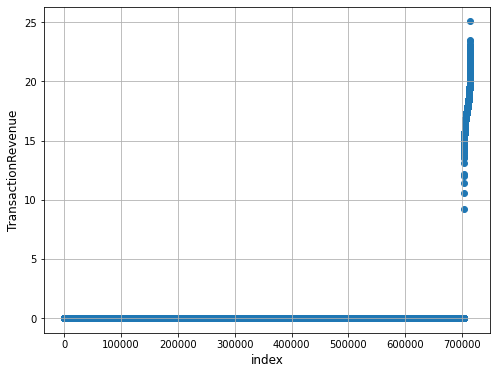

In [ ]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
gdf = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.grid()
plt.show()


Esto confirma las dos primeras líneas del resumen de la competencia:

La regla 80/20 ha demostrado ser cierta para muchas empresas:  **solo un pequeño porcentaje de clientes produce la mayor parte de los ingresos** . Como tal, los equipos de marketing se enfrentan al desafío de realizar inversiones adecuadas en estrategias promocionales.

In [ ]:
nzi = pd.notnull(train_df["totals.transactionRevenue"]).sum()
nzr = (gdf["totals.transactionRevenue"]>0).sum()
print("Número de instancias en las muestras de entrenamiento con ingresos diferentes de cero: ", nzi, " y la relación es : ", nzi / train_df.shape[0])
print("Número de clientes únicos con ingresos diferentes de cero: ", nzr, "y la relación es : ", nzr / gdf.shape[0])

Número de instancias en las muestras de entrenamiento con ingresos diferentes de cero:  903653  y la relación es :  1.0
Número de clientes únicos con ingresos diferentes de cero:  9996 y la relación es :  0.013996726255903731


# **Pre-analisis para construir modelo**

In [ ]:
print("Variables que estan en Train pero no estan en Test : ", set(train_df.columns).difference(set(test_df.columns)))

Variables que estan en Train pero no estan en Test :  {'totals.transactionRevenue', 'trafficSource.campaignCode'}



Entonces, aparte de la variable de destino, hay una variable más "trafficSource.campaignCode" que no está presente en el conjunto de datos de Test. Por lo que debemos eliminar esta variable mientras construimos modelos. 

También podemos eliminar el "sessionId" ya que es un identificador único de la visita.

In [ ]:
cols_to_drop =  ['sessionId']
train_df = train_df.drop(cols_to_drop + ["trafficSource.campaignCode"], axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

In [ ]:
print(train_df.shape,test_df.shape)

(903653, 34) (804684, 33)


# **Conversion variable categórica a númerica**

In [ ]:
y_train = train_df["totals.transactionRevenue"].values
train_id = train_df["fullVisitorId"].values
test_id = test_df["fullVisitorId"].values

# etiqueta codifica las variables categóricas y convierte las variables numéricas flotantes
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", "device.isMobile",
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))


num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
device.isMobile
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [ ]:
train_df.head(4)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,4,2016-09-02,1131660440785968503,1472830385,1.0,1.472830e+09,35,20,0,0,3,21,210,193,0,378,37454,1.0,1.0,1.0,1.0,0.0,4,208,5,11,0,3196,0,0,0,0,0,0
1,4,2016-09-02,377306020877927890,1472880147,1.0,1.472880e+09,43,7,0,0,5,1,12,482,122,955,10098,1.0,1.0,1.0,1.0,0.0,4,208,5,11,0,3196,0,0,0,0,0,0
2,4,2016-09-02,3895546263509774583,1472865386,1.0,1.472865e+09,35,20,0,0,4,19,185,99,0,475,38725,1.0,1.0,1.0,1.0,0.0,4,208,5,11,0,3196,0,0,0,0,0,0
3,4,2016-09-02,4763447161404445595,1472881213,1.0,1.472881e+09,79,6,0,0,3,16,94,482,122,955,38725,1.0,1.0,1.0,1.0,0.0,4,208,5,1608,0,3196,0,0,0,0,0,0


In [ ]:
train_df.dtypes

channelGrouping                                   int64
date                                             object
fullVisitorId                                    object
visitId                                           int64
visitNumber                                     float64
visitStartTime                                  float64
device.browser                                    int64
device.operatingSystem                            int64
device.isMobile                                   int64
device.deviceCategory                             int64
geoNetwork.continent                              int64
geoNetwork.subContinent                           int64
geoNetwork.country                                int64
geoNetwork.region                                 int64
geoNetwork.metro                                  int64
geoNetwork.city                                   int64
geoNetwork.networkDomain                          int64
totals.hits                                     

In [ ]:
test_df.head(4)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.newVisits,totals.bounces,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.referralPath,trafficSource.adContent
0,4,2017-10-16,6167871330617112363,1508151024,2.0,1.508151e+09,35,7,0,0,3,16,176,0,0,1,24691,4.0,4.0,0.0,0.0,4,208,5,11,1,0,0,0,0,0,3196,0
1,4,2017-10-16,0643697640977915618,1508175522,1.0,1.508176e+09,35,20,0,0,4,19,185,23,0,948,30734,5.0,5.0,1.0,0.0,4,208,5,11,0,0,0,0,0,0,3196,0
2,4,2017-10-16,6059383810968229466,1508143220,1.0,1.508143e+09,35,7,0,0,4,22,69,482,122,955,32535,7.0,7.0,1.0,0.0,4,208,5,11,0,0,0,0,0,0,3196,0
3,4,2017-10-16,2376720078563423631,1508193530,1.0,1.508194e+09,72,23,1,1,2,12,218,73,100,540,0,8.0,4.0,1.0,0.0,4,208,5,11,0,0,0,0,0,0,3196,0


In [ ]:
#Dividiendo los conjuntos de datos de entrenamiento y validacion segun el tiempo
dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
val_df = train_df[train_df['date']>datetime.date(2017,5,31)]
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

dev_X = dev_df[cat_cols + num_cols] 
val_X = val_df[cat_cols + num_cols] #La misma base de datos pero segmentada por la fecha 2017,5,31
test_X = test_df[cat_cols + num_cols] 

# **Modelo lightGBM**

In [ ]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.69755
[200]	valid_0's rmse: 1.69259
Early stopping, best iteration is:
[171]	valid_0's rmse: 1.69198


In [ ]:
model.best_iteration

171

ERROR por usuario

In [ ]:
pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

RMSE
1.7088726993835681


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
print('MAE')
print((metrics.mean_absolute_error(np.log1p(val_pred_df["transactionRevenue"].values ), np.log1p(val_pred_df["PredictedRevenue"].values))))

MAE
0.35171754946565037


ERROR por registro

In [ ]:
val_pred_df1 = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df1["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df1["PredictedRevenue"] = np.expm1(pred_val)
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df1["transactionRevenue"].values), np.log1p(val_pred_df1["PredictedRevenue"].values))))

RMSE
1.691162121140537


In [ ]:
print('MAE')
print((metrics.mean_absolute_error(np.log1p(val_pred_df1["transactionRevenue"].values ), np.log1p(val_pred_df1["PredictedRevenue"].values))))

MAE
0.3501253329487184


In [ ]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "mae", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l1: 0.363725
Early stopping, best iteration is:
[28]	valid_0's l1: 0.360797


In [ ]:
model.best_iteration

28

In [ ]:
pred_val[pred_val<0] = 0
val_pred_df2 = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df2["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df2["PredictedRevenue"] = np.expm1(pred_val)
val_pred_df2 = val_pred_df2.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df2["transactionRevenue"].values), np.log1p(val_pred_df2["PredictedRevenue"].values))))

RMSE
1.7941594397318048


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
print('MAE')
print((metrics.mean_absolute_error(np.log1p(val_pred_df2["transactionRevenue"].values ), np.log1p(val_pred_df2["PredictedRevenue"].values))))

MAE
0.3676355641636173


In [ ]:
val_pred_df3 = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df3["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df3["PredictedRevenue"] = np.expm1(pred_val)
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df3["transactionRevenue"].values), np.log1p(val_pred_df3["PredictedRevenue"].values))))

RMSE
1.742530395499133


In [ ]:
print('MAE')
print((metrics.mean_absolute_error(np.log1p(val_pred_df3["transactionRevenue"].values ), np.log1p(val_pred_df3["PredictedRevenue"].values))))

MAE
0.3586429107136866


In [ ]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv("baseline_lgb.csv", index=False)

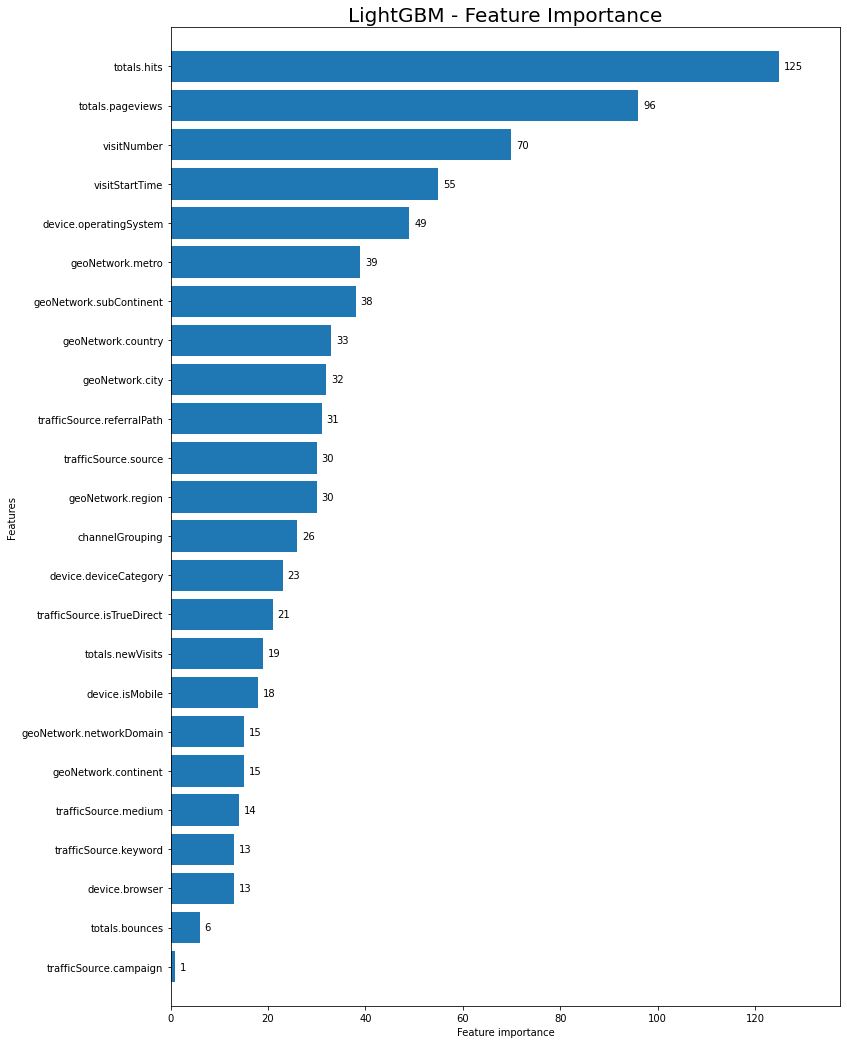

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=20)
plt.show()